In [41]:

import pandas as pd

data_path = '/Users/shashankshivakumar/Downloads/'
users_df = pd.read_csv(data_path + 'USER_TAKEHOME.csv',header=0)
products_df = pd.read_csv(data_path + 'PRODUCTS_TAKEHOME.csv',header=0)
transactions_df = pd.read_csv(data_path + 'TRANSACTION_TAKEHOME.csv',header=0)

print(users_df.head())

                         ID               CREATED_DATE  \
0  5ef3b4f17053ab141787697d  2020-06-24 20:17:54.000 Z   
1  5ff220d383fcfc12622b96bc  2021-01-03 19:53:55.000 Z   
2  6477950aa55bb77a0e27ee10  2023-05-31 18:42:18.000 Z   
3  658a306e99b40f103b63ccf8  2023-12-26 01:46:22.000 Z   
4  653cf5d6a225ea102b7ecdc2  2023-10-28 11:51:50.000 Z   

                  BIRTH_DATE STATE LANGUAGE  GENDER  
0  2000-08-11 00:00:00.000 Z    CA   es-419  female  
1  2001-09-24 04:00:00.000 Z    PA       en  female  
2  1994-10-28 00:00:00.000 Z    FL   es-419  female  
3                        NaN    NC       en     NaN  
4  1972-03-19 00:00:00.000 Z    PA       en  female  


In [42]:
# Check for missing values in each dataset
missing_values_summary = {
    "PRODUCTS_TAKEHOME": products_df.isnull().sum(),
    "TRANSACTION_TAKEHOME": transactions_df.isnull().sum(),
    "USER_TAKEHOME": users_df.isnull().sum()
}

# Display missing values
for dataset, missing in missing_values_summary.items():
    print(f"\nMissing values in {dataset}:")
    print(missing[missing > 0])  # Show only columns with missing values




Missing values in PRODUCTS_TAKEHOME:
CATEGORY_1         111
CATEGORY_2        1424
CATEGORY_3       60566
CATEGORY_4      778093
MANUFACTURER    226474
BRAND           226472
BARCODE           4025
dtype: int64

Missing values in TRANSACTION_TAKEHOME:
BARCODE    5762
dtype: int64

Missing values in USER_TAKEHOME:
BIRTH_DATE     3675
STATE          4812
LANGUAGE      30508
GENDER         5892
dtype: int64


In [43]:
# Count duplicate records
duplicate_records_summary = {
    "PRODUCTS_TAKEHOME": products_df.duplicated().sum(),
    "TRANSACTION_TAKEHOME": transactions_df.duplicated().sum(),
    "USER_TAKEHOME": users_df.duplicated().sum()
}

# Display duplicate records count
for dataset, duplicates in duplicate_records_summary.items():
    print(f"\nDuplicate records in {dataset}: {duplicates}")



Duplicate records in PRODUCTS_TAKEHOME: 215

Duplicate records in TRANSACTION_TAKEHOME: 171

Duplicate records in USER_TAKEHOME: 0


In [44]:
# Check data types of each dataset
data_types_summary = {
    "PRODUCTS_TAKEHOME": products_df.dtypes,
    "TRANSACTION_TAKEHOME": transactions_df.dtypes,
    "USER_TAKEHOME": users_df.dtypes
}

# Display data types
for dataset, dtypes in data_types_summary.items():
    print(f"\nData types in {dataset}:")
    print(dtypes)



Data types in PRODUCTS_TAKEHOME:
CATEGORY_1       object
CATEGORY_2       object
CATEGORY_3       object
CATEGORY_4       object
MANUFACTURER     object
BRAND            object
BARCODE         float64
dtype: object

Data types in TRANSACTION_TAKEHOME:
RECEIPT_ID         object
PURCHASE_DATE      object
SCAN_DATE          object
STORE_NAME         object
USER_ID            object
BARCODE           float64
FINAL_QUANTITY     object
FINAL_SALE         object
dtype: object

Data types in USER_TAKEHOME:
ID              object
CREATED_DATE    object
BIRTH_DATE      object
STATE           object
LANGUAGE        object
GENDER          object
dtype: object


In [45]:
# Find invalid birth dates (not in YYYY-MM-DD format)
invalid_birth_dates = users_df[~users_df['BIRTH_DATE'].astype(str).str.match(r'^\d{4}-\d{2}-\d{2}')]['BIRTH_DATE'].dropna()

# Display invalid birth dates
print("\nInvalid Birth Dates:")
print(invalid_birth_dates)



Invalid Birth Dates:
Series([], Name: BIRTH_DATE, dtype: object)


In [46]:
# Find non-numeric values in FINAL_QUANTITY and FINAL_SALE
invalid_final_quantity = transactions_df[~transactions_df['FINAL_QUANTITY'].astype(str).str.match(r'^\d+(\.\d+)?$', na=False)]['FINAL_QUANTITY'].dropna()
invalid_final_sale = transactions_df[~transactions_df['FINAL_SALE'].astype(str).str.match(r'^\d+(\.\d+)?$', na=False)]['FINAL_SALE'].dropna()

# Display problematic values
print("\nInvalid FINAL_QUANTITY values:")
print(invalid_final_quantity)

print("\nInvalid FINAL_SALE values:")
print(invalid_final_sale)



Invalid FINAL_QUANTITY values:
1        zero
3        zero
5        zero
7        zero
9        zero
         ... 
24991    zero
24993    zero
24995    zero
24997    zero
24999    zero
Name: FINAL_QUANTITY, Length: 12500, dtype: object

Invalid FINAL_SALE values:
0         
2         
4         
6         
8         
        ..
24990     
24992     
24994     
24996     
24998     
Name: FINAL_SALE, Length: 12500, dtype: object


In [47]:
unique_values_summary = {
    "CATEGORY_1": products_df["CATEGORY_1"].nunique(),
    "CATEGORY_2": products_df["CATEGORY_2"].nunique(),
    "CATEGORY_3": products_df["CATEGORY_3"].nunique(),
    "CATEGORY_4": products_df["CATEGORY_4"].nunique(),
    "STORE_NAME": transactions_df["STORE_NAME"].nunique(),
    "STATE": users_df["STATE"].nunique(),
    "LANGUAGE": users_df["LANGUAGE"].nunique(),
    "GENDER": users_df["GENDER"].unique()
}

# Display unique counts
print("\nUnique Values Summary:")
for key, value in unique_values_summary.items():
    print(f"{key}: {value}")



Unique Values Summary:
CATEGORY_1: 27
CATEGORY_2: 121
CATEGORY_3: 344
CATEGORY_4: 127
STORE_NAME: 954
STATE: 52
LANGUAGE: 2
GENDER: ['female' nan 'male' 'non_binary' 'transgender' 'prefer_not_to_say'
 'not_listed' 'Non-Binary' 'unknown' 'not_specified'
 "My gender isn't listed" 'Prefer not to say']


In [48]:
# Convert to numeric
transactions_df['FINAL_QUANTITY'] = pd.to_numeric(transactions_df['FINAL_QUANTITY'], errors='coerce')
transactions_df['FINAL_SALE'] = pd.to_numeric(transactions_df['FINAL_SALE'], errors='coerce')

# Identify extreme values
outlier_quantity = transactions_df[transactions_df['FINAL_QUANTITY'] > 100]  # Arbitrary threshold for bulk purchase check
outlier_sale = transactions_df[transactions_df['FINAL_SALE'] > 500]  # Checking for extreme sales

# Display findings
print("\nExtreme FINAL_QUANTITY values:")
print(outlier_quantity[['FINAL_QUANTITY', 'FINAL_SALE']])

print("\nExtreme FINAL_SALE values:")
print(outlier_sale[['FINAL_QUANTITY', 'FINAL_SALE']])



Extreme FINAL_QUANTITY values:
       FINAL_QUANTITY  FINAL_SALE
24810           276.0         NaN
42410           276.0        5.89

Extreme FINAL_SALE values:
Empty DataFrame
Columns: [FINAL_QUANTITY, FINAL_SALE]
Index: []


In [49]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# List of numerical columns that need normalization
numerical_columns = ["FINAL_QUANTITY", "FINAL_SALE"]

# Convert to numeric in case of any inconsistencies
transactions_df["FINAL_QUANTITY"] = pd.to_numeric(transactions_df["FINAL_QUANTITY"], errors='coerce')
transactions_df["FINAL_SALE"] = pd.to_numeric(transactions_df["FINAL_SALE"], errors='coerce')

# Drop NaN values for normalization (or impute them)
transactions_df.dropna(subset=numerical_columns, inplace=True)


In [50]:
scaler_minmax = MinMaxScaler()
transactions_df[["FINAL_QUANTITY_NORM", "FINAL_SALE_NORM"]] = scaler_minmax.fit_transform(transactions_df[numerical_columns])

# Preview normalized data
print(transactions_df[["FINAL_QUANTITY", "FINAL_QUANTITY_NORM", "FINAL_SALE", "FINAL_SALE_NORM"]].head())


       FINAL_QUANTITY  FINAL_QUANTITY_NORM  FINAL_SALE  FINAL_SALE_NORM
25000             1.0             0.003587        1.65         0.003565
25001             1.0             0.003587        1.65         0.003565
25002             1.0             0.003587       28.22         0.060974
25003             1.0             0.003587        5.25         0.011344
25004             1.0             0.003587        2.59         0.005596


In [51]:
scaler_standard = StandardScaler()
transactions_df[["FINAL_QUANTITY_STD", "FINAL_SALE_STD"]] = scaler_standard.fit_transform(transactions_df[numerical_columns])

# Preview standardized data
print(transactions_df[["FINAL_QUANTITY", "FINAL_QUANTITY_STD", "FINAL_SALE", "FINAL_SALE_STD"]].head())


       FINAL_QUANTITY  FINAL_QUANTITY_STD  FINAL_SALE  FINAL_SALE_STD
25000             1.0           -0.046557        1.65       -0.446788
25001             1.0           -0.046557        1.65       -0.446788
25002             1.0           -0.046557       28.22        3.619141
25003             1.0           -0.046557        5.25        0.104109
25004             1.0           -0.046557        2.59       -0.302943


In [52]:
scaler_robust = RobustScaler()
transactions_df[["FINAL_QUANTITY_ROBUST", "FINAL_SALE_ROBUST"]] = scaler_robust.fit_transform(transactions_df[numerical_columns])

# Preview robust scaled data
print(transactions_df[["FINAL_QUANTITY", "FINAL_QUANTITY_ROBUST", "FINAL_SALE", "FINAL_SALE_ROBUST"]].head())


       FINAL_QUANTITY  FINAL_QUANTITY_ROBUST  FINAL_SALE  FINAL_SALE_ROBUST
25000             1.0                    0.0        1.65          -0.398230
25001             1.0                    0.0        1.65          -0.398230
25002             1.0                    0.0       28.22           7.439528
25003             1.0                    0.0        5.25           0.663717
25004             1.0                    0.0        2.59          -0.120944


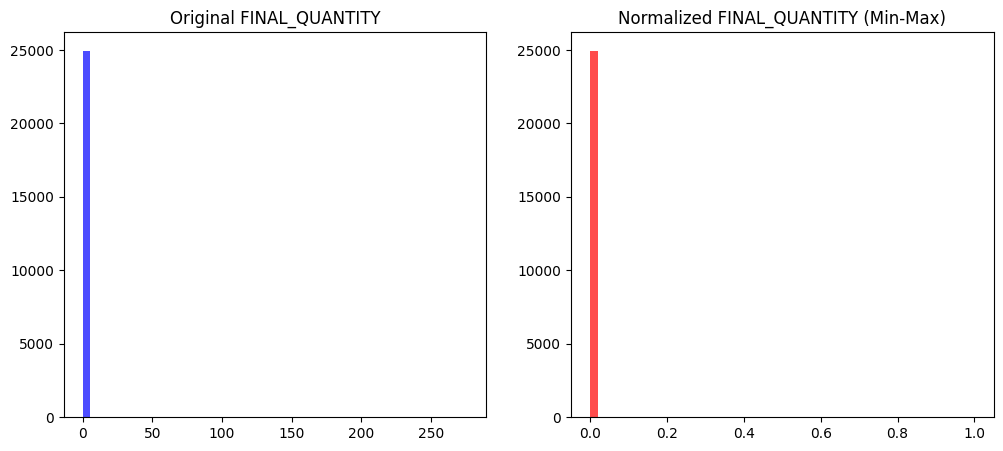

In [53]:
import matplotlib.pyplot as plt

# Plot original vs normalized FINAL_QUANTITY
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(transactions_df["FINAL_QUANTITY"], bins=50, color="blue", alpha=0.7)
plt.title("Original FINAL_QUANTITY")

plt.subplot(1, 2, 2)
plt.hist(transactions_df["FINAL_QUANTITY_NORM"], bins=50, color="red", alpha=0.7)
plt.title("Normalized FINAL_QUANTITY (Min-Max)")

plt.show()


In [54]:
import numpy as np
transactions_df["FINAL_QUANTITY_LOG"] = np.log1p(transactions_df["FINAL_QUANTITY"])


In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
transactions_df["FINAL_QUANTITY_STD"] = scaler.fit_transform(transactions_df[["FINAL_QUANTITY"]])


In [56]:
from datetime import datetime

# Convert BIRTH_DATE to datetime
users_df["BIRTH_DATE"] = pd.to_datetime(users_df["BIRTH_DATE"], errors="coerce")

# Calculate age
current_year = datetime.now().year
users_df["AGE"] = current_year - users_df["BIRTH_DATE"].dt.year

# Drop rows with missing AGE values
users_df.dropna(subset=["AGE"], inplace=True)

# Normalize AGE using Min-Max Scaling
scaler_minmax = MinMaxScaler()
users_df["AGE_NORM"] = scaler_minmax.fit_transform(users_df[["AGE"]])

# Preview normalized age
print(users_df[["AGE", "AGE_NORM"]].head())



    AGE  AGE_NORM
0  25.0  0.180328
1  24.0  0.172131
2  31.0  0.229508
4  53.0  0.409836
5  26.0  0.188525


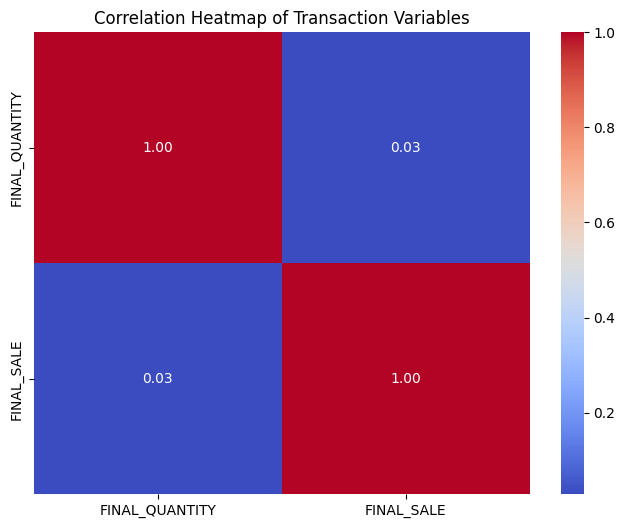

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = transactions_df[["FINAL_QUANTITY", "FINAL_SALE"]].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Transaction Variables")
plt.show()


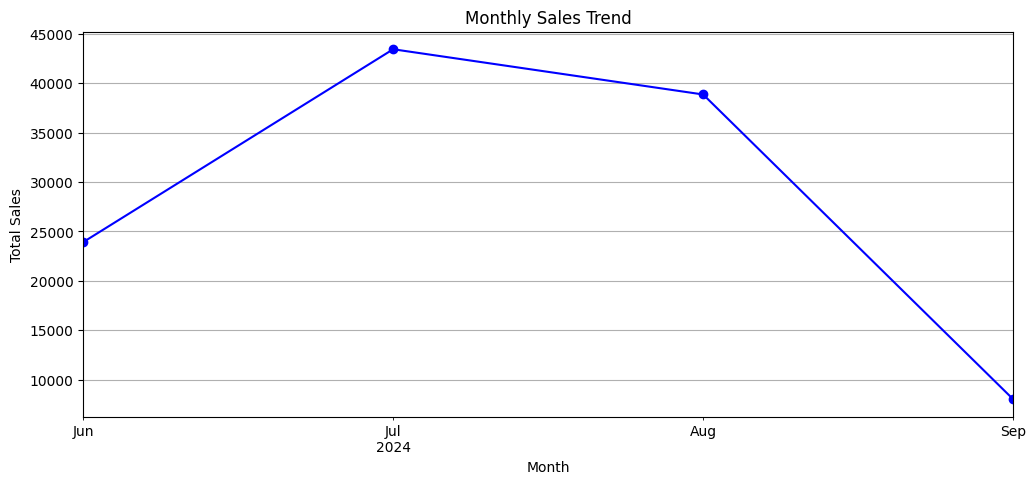

In [58]:
# Convert purchase date to datetime
transactions_df["PURCHASE_DATE"] = pd.to_datetime(transactions_df["PURCHASE_DATE"])

# Aggregate sales per month
monthly_sales = transactions_df.groupby(transactions_df["PURCHASE_DATE"].dt.to_period("M"))["FINAL_SALE"].sum()

# Plot
plt.figure(figsize=(12, 5))
monthly_sales.plot(kind="line", marker="o", color="b")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid()
plt.show()


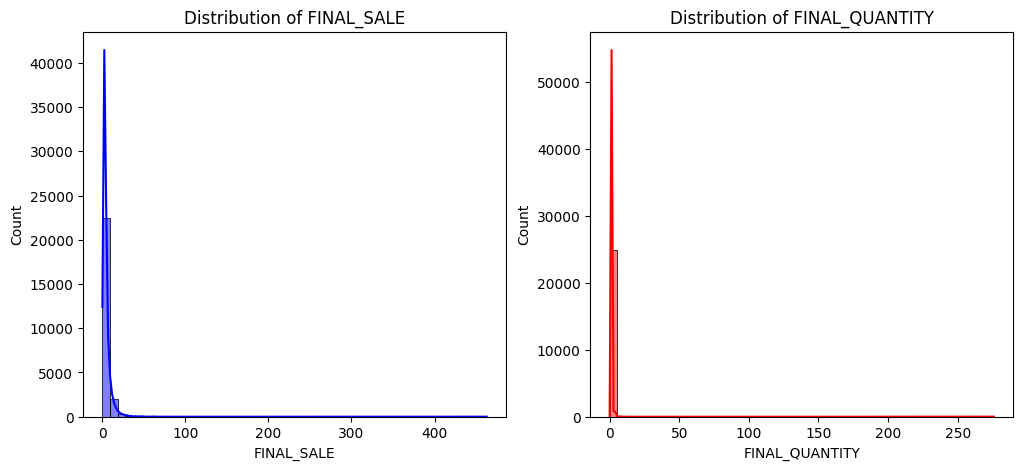

In [59]:
plt.figure(figsize=(12, 5))

# Plot Final Sale Distribution
plt.subplot(1, 2, 1)
sns.histplot(transactions_df["FINAL_SALE"], bins=50, kde=True, color="blue")
plt.title("Distribution of FINAL_SALE")

# Plot Final Quantity Distribution
plt.subplot(1, 2, 2)
sns.histplot(transactions_df["FINAL_QUANTITY"], bins=50, kde=True, color="red")
plt.title("Distribution of FINAL_QUANTITY")

plt.show()


In [60]:
transactions_df[["FINAL_QUANTITY", "FINAL_SALE"]].corr()


,FINAL_QUANTITY,FINAL_SALE
FINAL_QUANTITY,1.000000,0.028494
FINAL_SALE,0.028494,1.000000


In [61]:
import numpy as np
transactions_df["FINAL_SALE_LOG"] = np.log1p(transactions_df["FINAL_SALE"])
transactions_df["FINAL_QUANTITY_LOG"] = np.log1p(transactions_df["FINAL_QUANTITY"])


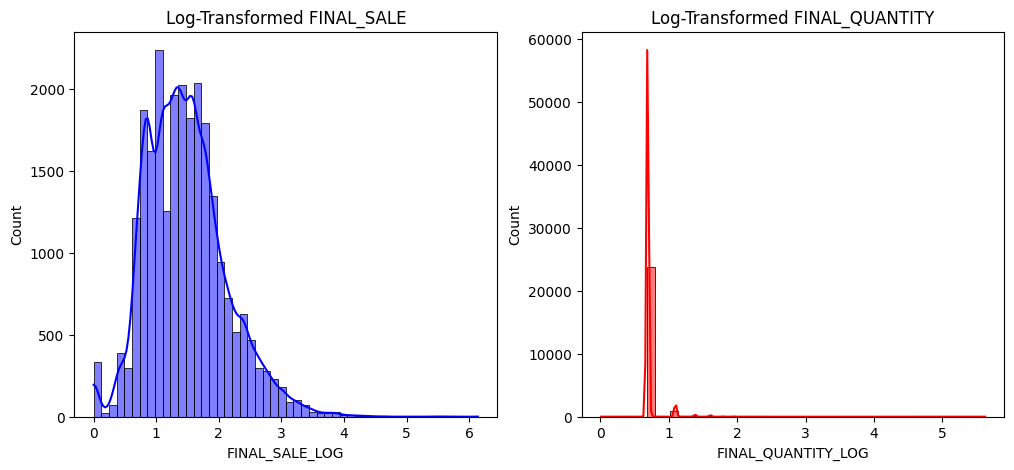

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(transactions_df["FINAL_SALE_LOG"], bins=50, kde=True, color="blue")
plt.title("Log-Transformed FINAL_SALE")

plt.subplot(1, 2, 2)
sns.histplot(transactions_df["FINAL_QUANTITY_LOG"], bins=50, kde=True, color="red")
plt.title("Log-Transformed FINAL_QUANTITY")

plt.show()


/var/folders/h4/qr8qv8bj5_d18b87ft00s3s00000gn/T/ipykernel_43321/3378946988.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.index, y=top_brands.values, palette="coolwarm")


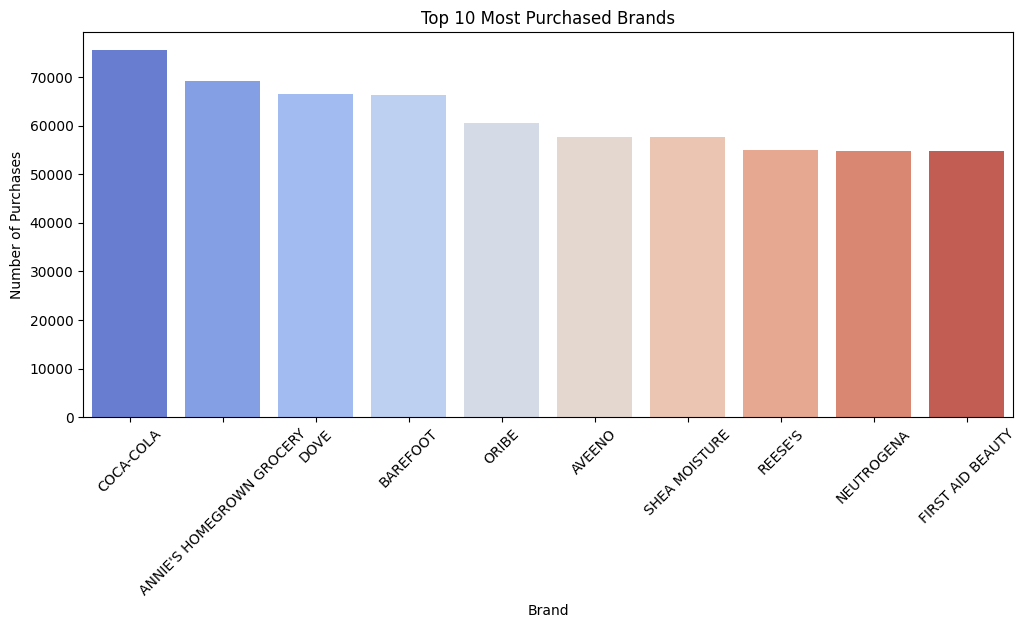

In [63]:
top_brands = transactions_df.merge(products_df, on="BARCODE")["BRAND"].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 5))
sns.barplot(x=top_brands.index, y=top_brands.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Top 10 Most Purchased Brands")
plt.xlabel("Brand")
plt.ylabel("Number of Purchases")
plt.show()


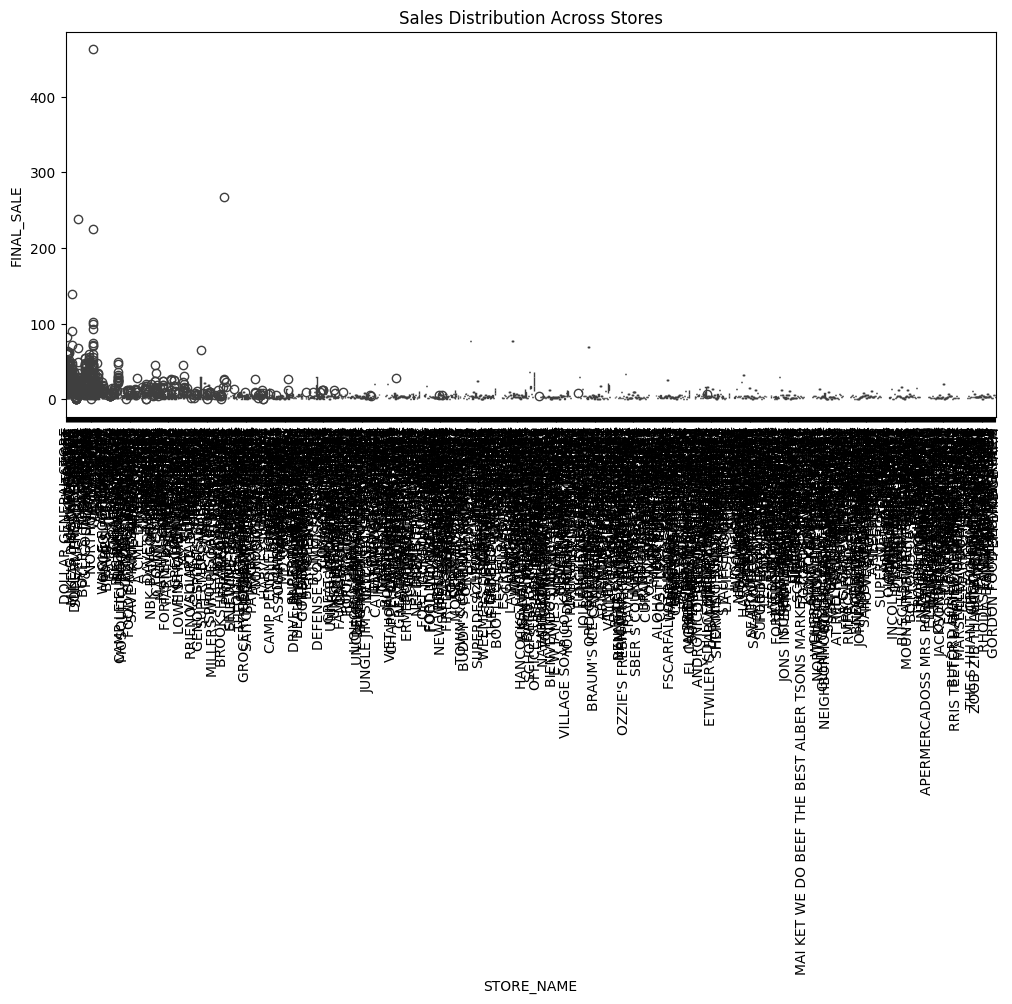

In [64]:
plt.figure(figsize=(12, 5))
sns.boxplot(x="STORE_NAME", y="FINAL_SALE", data=transactions_df)
plt.xticks(rotation=90)
plt.title("Sales Distribution Across Stores")
plt.show()


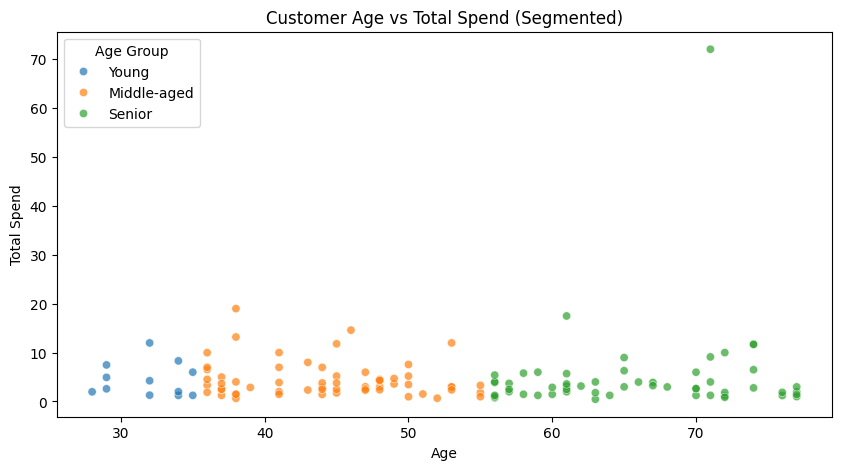

In [65]:
# Define age groups
bins = [18, 35, 55, 80]
labels = ["Young", "Middle-aged", "Senior"]
transactions_users["AGE_GROUP"] = pd.cut(transactions_users["AGE"], bins=bins, labels=labels)

# Replot scatter with color-coded age groups
plt.figure(figsize=(10, 5))
sns.scatterplot(x="AGE", y="FINAL_SALE", hue="AGE_GROUP", data=transactions_users, alpha=0.7)
plt.title("Customer Age vs Total Spend (Segmented)")
plt.xlabel("Age")
plt.ylabel("Total Spend")
plt.legend(title="Age Group")
plt.show()



/var/folders/h4/qr8qv8bj5_d18b87ft00s3s00000gn/T/ipykernel_43321/1385195641.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette="viridis")


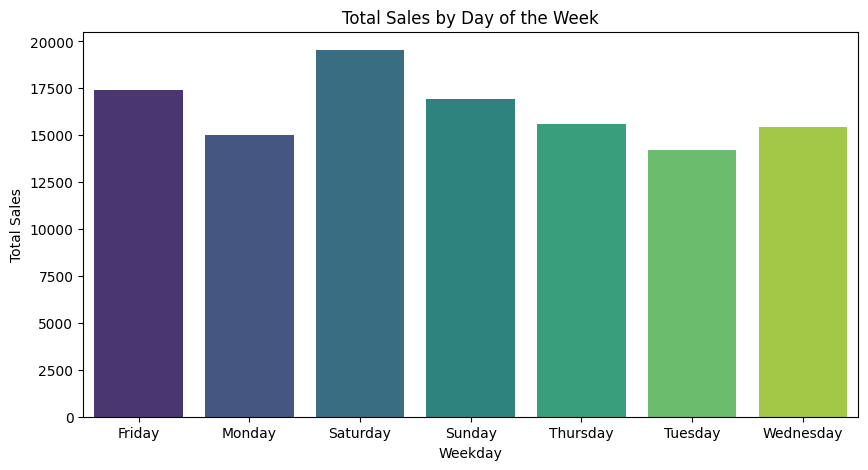

In [66]:
# Extract weekday
transactions_df["WEEKDAY"] = transactions_df["PURCHASE_DATE"].dt.day_name()

# Aggregate sales by weekday
weekday_sales = transactions_df.groupby("WEEKDAY")["FINAL_SALE"].sum()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette="viridis")
plt.title("Total Sales by Day of the Week")
plt.xlabel("Weekday")
plt.ylabel("Total Sales")
plt.show()


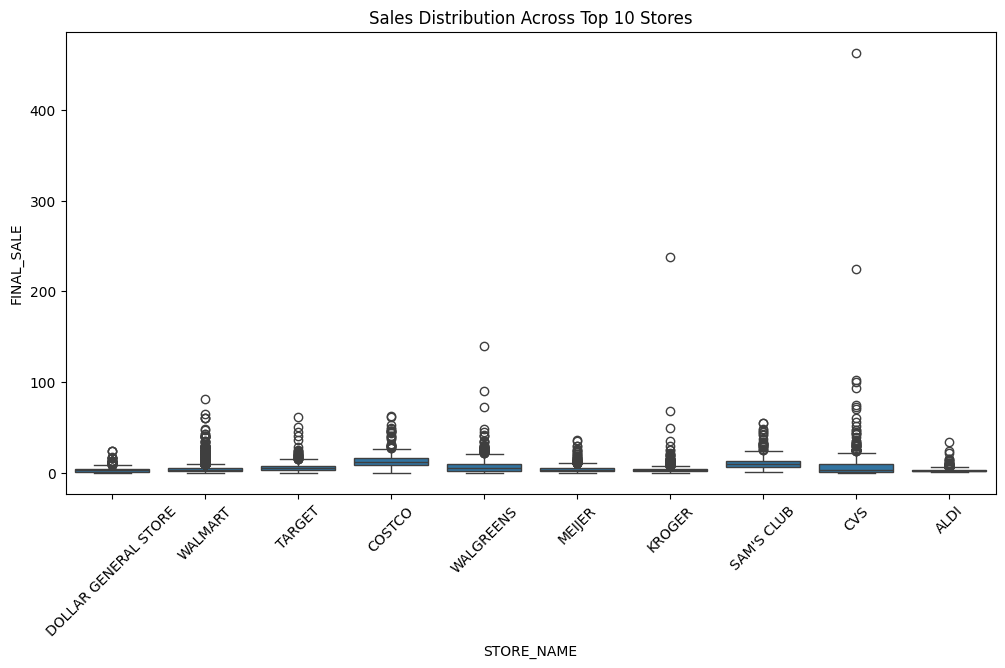

In [67]:
# Aggregate sales per store
top_stores = transactions_df.groupby("STORE_NAME")["FINAL_SALE"].sum().nlargest(10)

# Plot again with only Top 10 stores
plt.figure(figsize=(12, 6))
sns.boxplot(x="STORE_NAME", y="FINAL_SALE", data=transactions_df[transactions_df["STORE_NAME"].isin(top_stores.index)])
plt.xticks(rotation=45)
plt.title("Sales Distribution Across Top 10 Stores")
plt.show()


In [68]:

# Step 1: Investigate Bulk Purchases (FINAL_QUANTITY > 50)
bulk_threshold = 50
bulk_purchases = transactions_df[transactions_df["FINAL_QUANTITY"] > bulk_threshold]

# Group by Store and Brand to check bulk purchase trends
bulk_by_store = (
    bulk_purchases.groupby("STORE_NAME")["FINAL_QUANTITY"]
    .count()
    .reset_index()
    .sort_values(by="FINAL_QUANTITY", ascending=False)
)
bulk_by_brand = (
    bulk_purchases.merge(products_df, on="BARCODE", how="left")
    .groupby("BRAND")["FINAL_QUANTITY"]
    .count()
    .reset_index()
    .sort_values(by="FINAL_QUANTITY", ascending=False)
)

# Step 2: Create a new feature - AVG_PRICE_PER_ITEM
transactions_df["AVG_PRICE_PER_ITEM"] = transactions_df["FINAL_SALE"] / transactions_df["FINAL_QUANTITY"]
transactions_df["AVG_PRICE_PER_ITEM"].fillna(0, inplace=True)  # Handle divide-by-zero cases

# Step 3: Segment Customers by Spending Behavior
customer_spending = transactions_df.groupby("USER_ID")["FINAL_SALE"].sum().reset_index()

# Create quartile-based spending categories
customer_spending["SPENDING_CATEGORY"] = pd.qcut(
    customer_spending["FINAL_SALE"], q=4, labels=["Low", "Medium", "High", "Very High"]
)

# Step 4: Merge with User Data
transactions_users = transactions_df.merge(users_df, left_on="USER_ID", right_on="ID", how="left")
transactions_users = transactions_users.merge(customer_spending, on="USER_ID", how="left")

# Display Results
print("\nBulk Purchases by Store:")
print(bulk_by_store.head(10))  # Top 10 stores with bulk purchases

print("\nBulk Purchases by Brand:")
print(bulk_by_brand.head(10))  # Top 10 brands in bulk purchases

print("\nCustomer Spending Segmentation:")
print(customer_spending.head(10))  # Sample of customer spending categories



Bulk Purchases by Store:
           STORE_NAME  FINAL_QUANTITY
0  MAIN STREET MARKET               1

Bulk Purchases by Brand:
Empty DataFrame
Columns: [BRAND, FINAL_QUANTITY]
Index: []

Customer Spending Segmentation:
                    USER_ID  FINAL_SALE SPENDING_CATEGORY
0  53ce6404e4b0459d949f33e9        3.49            Medium
1  548e5dfae4b096ae8875dfec        1.99               Low
2  56242219e4b07364e3e0bef4        1.59               Low
3  5640f111e4b0a905f487f861        3.19            Medium
4  5748f001e4b03a732e4ecdc0        1.68               Low
5  5751fbefe4b008fae9acab39       14.99         Very High
6  575431e2e4b008fae9ad26e1       11.00         Very High
7  5769c316e4b0ba1ab70e8648        0.98               Low
8  579408e9e4b06c424fdff0ad        9.94         Very High
9  57adea34e4b0b3b7cade6c1b        8.97         Very High


/var/folders/h4/qr8qv8bj5_d18b87ft00s3s00000gn/T/ipykernel_43321/3103333265.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  transactions_df["AVG_PRICE_PER_ITEM"].fillna(0, inplace=True)  # Handle divide-by-zero cases
